* 'textract' install failures caused by dependencies.  Not friendly with 64-bit os and requires a compilier for part of the installation = pain in the ass!
* https://github.com/deanmalmgren/textract/issues/111
* http://www.swig.org/Doc1.3/Windows.html
* https://medium.com/@rqaiserr/how-to-convert-pdfs-into-searchable-key-words-with-python-85aab86c544f

# NLTK - Natural Language Toolkit

* http://www.nltk.org/index.html

In [1]:
import PyPDF2 
#import textract
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import pprint as pp
import pandas as pd
import numpy as np

In [2]:
#write a for-loop to open many files -- leave a comment if you'd #like to learn how
filename_list = ['Keysight N6705 DC Power Analyzer.pdf',
                 'Intel 2017-Proxy-Statement.pdf',
                 'nike-2017-form-10K.pdf']

filename = filename_list[1]
#open allows you to read the file
pdfFileObj = open(filename,'rb')
#The pdfReader variable is a readable object that will be parsed
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
#discerning the number of pages will allow us to parse through all #the pages
num_pages = pdfReader.numPages
count = 0
text = ""
#The while loop will read each page
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
#This if statement exists to check if the above library returned #words. It's done because PyPDF2 cannot read scanned files.
if text != "":
   text = text
#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text
else:
    print('The PDF being processed is an image, not text based PDF.\n'\
          'There are issues getting "textract" installed on 64-bit Windows')
   #text = textract.process(fileurl, method='tesseract', language='eng')
# Now we have a text variable which contains all the text derived #from our PDF file. Type print(text) to see what it contains. It #likely contains a lot of spaces, possibly junk such as '\n' etc.
# Now, we will clean our text variable, and return it as a list of keywords.


In [3]:
#The word_tokenize() function will break our text phrases into #individual words
tokens = word_tokenize(text)
#we'll create a new list which contains punctuation we wish to clean
punctuations = ['(',')',';',':','[',']',',']
#We initialize the stopwords variable which is a list of words like #"The", "I", "and", etc. that don't hold much value as keywords
stop_words = stopwords.words('english')

In [4]:
more_stop_words = ['...', '..', 'the']
for x in more_stop_words:
    stop_words.append(x)

In [5]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
#We create a list comprehension which only returns a list of words that are NOT IN stop_words and NOT IN punctuations.
keywords = [word.lower() for word in tokens if not word.lower() in stop_words and not word in string.punctuation]

In [7]:
len(keywords)

8929

In [8]:
"""Remove numbers using float test"""
keywords_no_numbers = []
for x in keywords:
    try:
        float(x)
    except:
        keywords_no_numbers.append(x)
        
print(len(keywords_no_numbers))

8693


In [9]:
word_count = {}

In [10]:
"""Strip whitespace and certain characters"""
for x in keywords_no_numbers:
    x = x.lower()
    x = x.strip()
    x = x.strip('-+.!')
    if x not in word_count:
        word_count[x] = 1
    else:
        word_count[x] += 1

In [11]:
# pp.pprint(word_count)

## With pandas.DataFrames

In [12]:
df = pd.DataFrame.from_dict(word_count, orient='index')

In [13]:
df.reset_index(inplace=True)

In [14]:
df.columns = ['word', 'count']

In [15]:
df.head()

,word,count
0,"april6,2017",2
1,dearstockholder,1
2,intel™sbusinessmodelisevolvingfromapccompanyto...,1
3,connectedworld.weareproudtoberecognizedaroundt...,1
4,companythanwewerefiveyearsago,1


In [16]:
# df.head(10).to_clipboard(index=False, sep='//s+')

### small `dict` of words

In [17]:
df = pd.DataFrame({'word': ['how', 'are', 'you', 'doing', 'this', 'afternoon'],
                   'count': [7, 10, 4, 1, 20, 100]})

In [18]:
df

,word,count
0,how,7
1,are,10
2,you,4
3,doing,1
4,this,20
5,afternoon,100


In [19]:
data = dict(zip(df['word'].tolist(), df['count'].tolist()))

In [20]:
data

{'how': 7, 'are': 10, 'you': 4, 'doing': 1, 'this': 20, 'afternoon': 100}

### Large NYTimes vocab dataset

In [21]:
nyt = pd.read_csv('vocab.nytimes.txt', header=None)

In [22]:
len(nyt)

102660

In [23]:
nyt['count'] = [np.random.randint(400) for _ in range(102660)]

In [24]:
nyt.columns = ['word', 'count']

In [25]:
nyt.head()

,word,count
0,aah,116
1,aahed,21
2,aaron,383
3,aback,357
4,abacus,6


In [26]:
data_nyt = dict(zip(nyt['word'].tolist(), nyt['count'].tolist()))

# Plot the WordCloud

* https://www.quora.com/How-can-I-generate-a-word-cloud-in-python-using-exclusively-matplotlib-seaborn-and-pandas-numpy-packages
* https://stackoverflow.com/questions/44750574/creating-wordcloud-using-python
* https://github.com/amueller/word_cloud
* https://stackoverflow.com/questions/28786534/increase-resolution-with-word-cloud-and-remove-empty-border

In [27]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [28]:
# Counter(keywords_no_numbers)

# Masks

In [29]:
intel_mask = np.array(Image.open('intel logo.png'))
nike_mask = np.array(Image.open('Nike-Logo-PNG.png'))
twitter_mask = np.array(Image.open('twitter.png'))

# Generic Wordcloud

In [30]:
wordcloud = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(word_count)

In [31]:
len(word_count)

7250

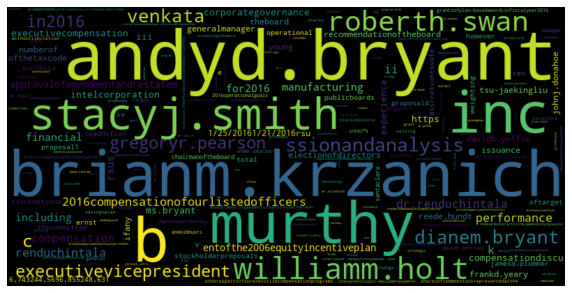

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
wordcloud_nyt = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data_nyt)

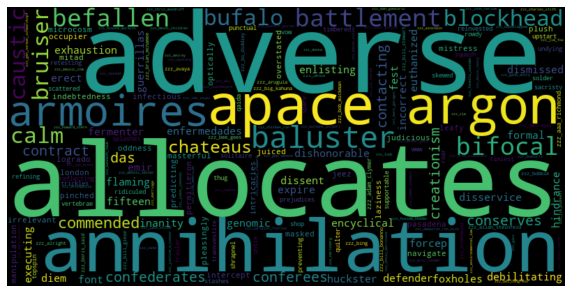

In [34]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_nyt, interpolation='bilinear')
plt.axis('off')
plt.show()

# Intel

In [35]:
wordcloud = WordCloud(background_color='white', max_words=200, mask=intel_mask).generate_from_frequencies(word_count)

In [36]:
wordcloud.to_file('intel.png')

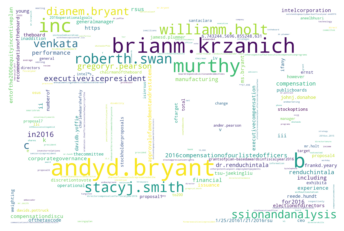

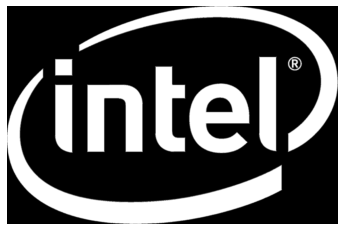

In [37]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(intel_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# Nike

In [38]:
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, mask=nike_mask).generate_from_frequencies(word_count)

In [39]:
wordcloud.to_file('nike.png')

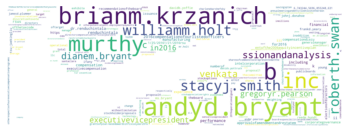

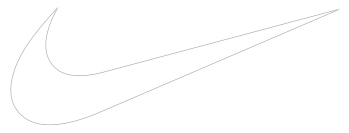

In [40]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(nike_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# Twitter

In [41]:
wc = WordCloud(background_color='black', width=800, height=400, max_words=200, mask=twitter_mask).generate_from_frequencies(data_nyt)

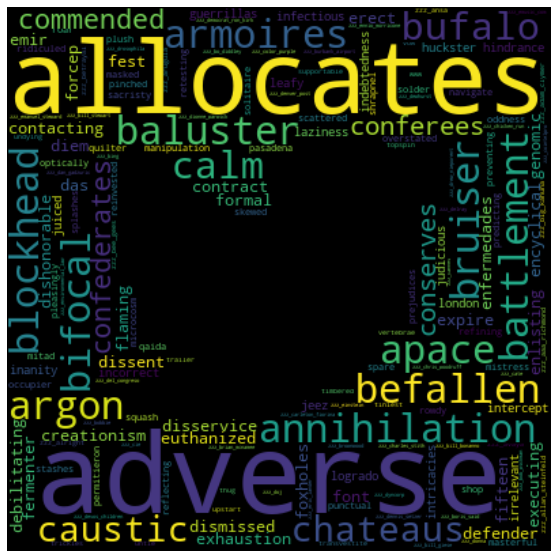

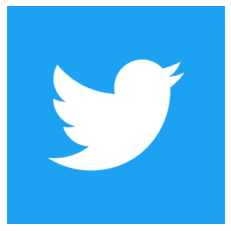

In [42]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(twitter_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

# Used to update the Natural Language Tool Kit

In [43]:
# import nltk

In [44]:
# nltk.set_proxy('proxy address', ('un', 'pw'))  # comment out if not behind a proxy
# nltk.download()